목    적 => 이미지 분류 모델  
데 이 터 => Fashion-mnist  
전제조건 => 교차 검증, 최적의 하이퍼파라미터 설정, 새로운 데이터로 예측  

In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf

[1] 데이터 로딩 및 확인

[2] 학습 데이터 준비

In [36]:
# 반환: Tuple of NumPy arrays
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

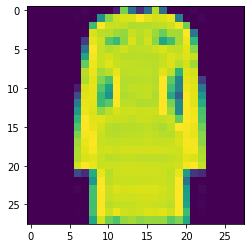

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[500])
plt.show()

In [37]:
data = x_train.reshape(-1, 28*28)
test = x_test.reshape(-1, 28*28)

In [38]:
data.shape, test.shape

((60000, 784), (10000, 784))

In [39]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [40]:
# 픽셀 0 ~ 1 정규화
data = data/255.0
test = test/255.0

1. 로지스틱 회귀

- 모델 생성 및 학습

In [33]:
from sklearn.linear_model import LogisticRegression

In [41]:
lrModel = LogisticRegression(multi_class='multinomial')

In [42]:
lrModel.fit(data, y_train) 

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

- 모델 평가

In [87]:
print('lrMoel train score: {}'.format(lrModel.score(data, y_train)))
print('lrMoel test score: {}'.format(lrModel.score(test, y_test)))
      

lrMoel train score: 0.86625
lrMoel test score: 0.8439


1-1. 교차 검증

In [44]:
from sklearn.model_selection import cross_validate
import pandas as pd

In [45]:
allResult = cross_validate(lrModel, data, y_train, return_train_score=True)
resultDf = pd.DataFrame(allResult)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [89]:
resultDf['train_score'].mean(), resultDf['test_score'].mean()

(0.8680625, 0.85625)

1-2. 최적의 하이퍼파라미터

In [22]:
from sklearn.model_selection import GridSearchCV

In [50]:
params = {'max_iter': [100, 150, 200, 250]}
lr = LogisticRegression()
grid_lr = GridSearchCV(lr, param_grid=params, cv=5, refit=True)
grid_lr.fit(data, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 150, 200, 250]})

In [52]:
print('best parameters: {}'.format(grid_lr.best_params_))
print('best score: {}'.format(round(grid_lr.best_score_, 5)))
print('best estimator: {}'.format(grid_lr.best_estimator_))

best parameters: {'max_iter': 100}
best score: 0.85625
best estimator: LogisticRegression()


2. 히스트그래디언트부스팅

In [96]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [97]:
hgbModel = HistGradientBoostingClassifier(random_state=42)
hgbModel.fit(data, y_train)

HistGradientBoostingClassifier(random_state=42)

In [98]:
hgbModel.score(data, y_train), hgbModel.score(test, y_test)

(0.9865833333333334, 0.8945)

In [99]:
params = {'learning_rate': [0.01, 0.1, 1],
          'max_depth': [1, 3, 5]}
hgb = HistGradientBoostingClassifier()
grid_hgb = GridSearchCV(hgb, param_grid=params, cv=5, refit=True)
grid_hgb.fit(data, y_train)

- 최적의 모델 찾아보기

In [54]:
from sklearn.utils import all_estimators
# 필터 타입에 해당하는 sklearn에 존재하는 모든 모델 이름과 객체 리스트로 반환
models = all_estimators(type_filter='classifier')

In [84]:
import random
randomIndex1 = [random.randint(0,60000) for value in range(0,1600)]
randomIndex2 = [random.randint(0,10000) for value in range(0,400)]

In [85]:
import numpy as np

scores = []
names = []

for name, model in models:
    try:
        # 모델 객체 생성
        md = model()
        # 학습
        md.fit(data[randomIndex1], y_train[randomIndex1])
        # 평가
        result1 = md.score(data[randomIndex1], y_train[randomIndex1])
        result2 = md.score(test[randomIndex2], y_test[randomIndex2])
        names.append(name)
        scores.append((name, np.round(result1,3), np.round(result2,3)))
    except:
        pass

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in t

In [95]:
scores

[('AdaBoostClassifier', 0.346, 0.295),
 ('BaggingClassifier', 0.996, 0.742),
 ('BernoulliNB', 0.73, 0.69),
 ('CalibratedClassifierCV', 1.0, 0.798),
 ('ComplementNB', 0.639, 0.575),
 ('DecisionTreeClassifier', 1.0, 0.71),
 ('DummyClassifier', 0.115, 0.085),
 ('ExtraTreeClassifier', 1.0, 0.665),
 ('ExtraTreesClassifier', 1.0, 0.8),
 ('GaussianNB', 0.59, 0.535),
 ('GaussianProcessClassifier', 1.0, 0.772),
 ('GradientBoostingClassifier', 1.0, 0.83),
 ('HistGradientBoostingClassifier', 1.0, 0.835),
 ('KNeighborsClassifier', 0.837, 0.775),
 ('LabelPropagation', 1.0, 0.71),
 ('LabelSpreading', 1.0, 0.71),
 ('LinearDiscriminantAnalysis', 0.982, 0.68),
 ('LinearSVC', 1.0, 0.782),
 ('LogisticRegression', 0.986, 0.812),
 ('LogisticRegressionCV', 0.962, 0.818),
 ('MLPClassifier', 1.0, 0.825),
 ('MultinomialNB', 0.67, 0.632),
 ('NearestCentroid', 0.698, 0.655),
 ('NuSVC', 0.84, 0.765),
 ('PassiveAggressiveClassifier', 0.952, 0.815),
 ('Perceptron', 0.919, 0.768),
 ('QuadraticDiscriminantAnalysis', 